In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Read data
df=pd.read_csv('../data/train.csv')
df=df.drop(['casual', 'registered', 'atemp'], axis=1)

In [33]:
# Convert datetime to pandas datetime and set it as index
df['datetime']=pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

In [34]:
# Split datetime into its constituents parts
df['hour']=df.index.hour
df['dayofweek']=df.index.dayofweek
df['month']=df.index.month
df['year']=df.index.year

In [35]:
# Mkae hour and nonth to cyclic features using trignometric functions
df['hour_sin']=np.sin((2*np.pi*df['hour'])/24)
df['hour_cos']=np.cos((2*np.pi*df['hour'])/24)
df['month_sin']=np.sin((2*np.pi*df['month'])/12)
df['month_cos']=np.cos((2*np.pi*df['month'])/12)

In [36]:
# Extract more insights from the time data
df['is_weekend']=df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)
df['is_peak_commute']=df['hour'].isin([7, 8, 9, 17, 18, 19]).astype(int)

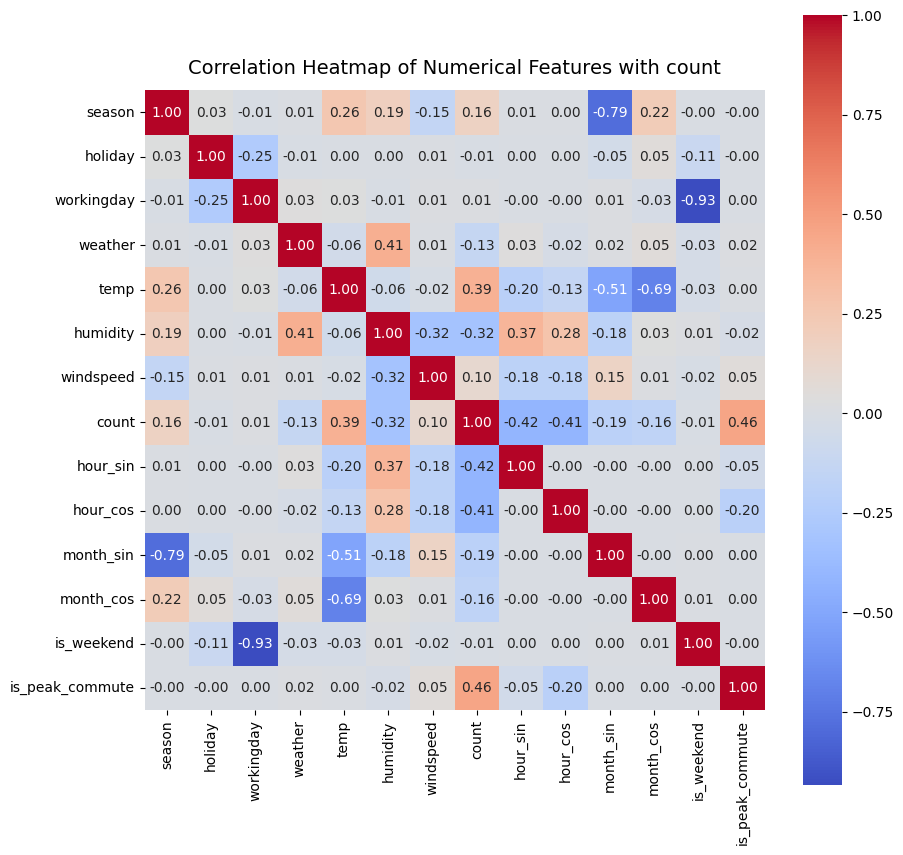

In [ ]:
# Plot the heatmapfor new features
numeric_df=df.select_dtypes(include=['float64', 'int64'])
corr_matrix=numeric_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Numerical Features with count", fontsize=14, pad=12)
plt.show()

In [39]:
# Drop workingday feature as it has high correlation with the is_weekend feature
df=df.drop(['workingday'], axis=1)

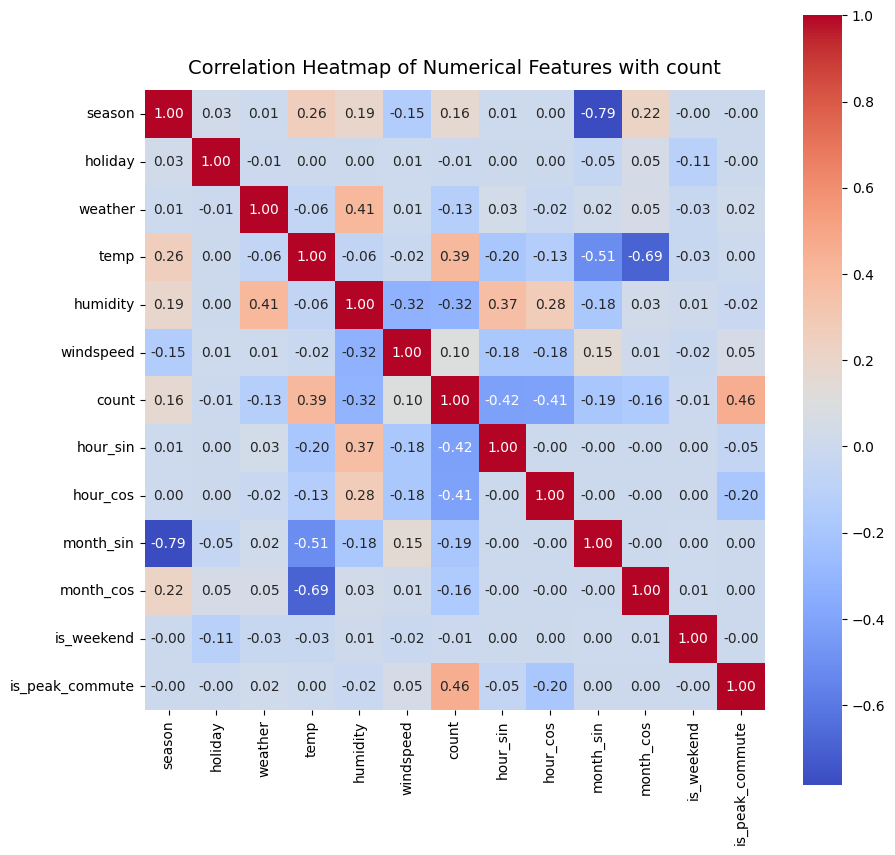

In [40]:
numeric_df=df.select_dtypes(include=['float64', 'int64'])
corr_matrix=numeric_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Numerical Features with count", fontsize=14, pad=12)
plt.show()